# Time Series Analysis

A *time series* is any data that is indexed by some measure of time.

A *time series plot* is a graph where some measure of time is the unit on the x-axis, often called the time-axis. The y-axis is for the variable that is being measured.

Time series analysis comprises methods for analyzing time series data in order to extract meaningful statistics and other characteristics of the data.

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

### Data Preparation

In [2]:
# read and process the charts dataset
df = pd.read_csv('data/spotify_daily_charts.csv')
#transform date column into a datetime column
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')
df.head()

,position,track_id,track_name,artist,streams
date,,,,,
2017-01-01,1,0kN8xEmgMW9mh7UmDYHlJP,Versace on the Floor,Bruno Mars,185236
2017-01-01,2,5uCax9HTNlzGybIStD3vDh,Say You Won't Let Go,James Arthur,180552
2017-01-01,3,7BKLCZ1jbUBVqRi2FVlTVw,Closer,The Chainsmokers,158720
2017-01-01,4,2rizacJSyD9S1IQUxUxnsK,All We Know,The Chainsmokers,130874
2017-01-01,5,5MFzQMkrl1FOOng9tq6R9r,Don't Wanna Know,Maroon 5,129656


## 1. Bounding margins and outliers

Plot time series of Ben&Ben Kathang  Isip

In [6]:
pd.date_range(data.index.min(), data.index.max())

DatetimeIndex(['2021-10-15', '2021-10-16', '2021-10-17', '2021-10-18',
               '2021-10-19', '2021-10-20', '2021-10-21', '2021-10-22',
               '2021-10-23', '2021-10-24', '2021-10-25', '2021-10-26',
               '2021-10-27', '2021-10-28', '2021-10-29', '2021-10-30',
               '2021-10-31', '2021-11-01', '2021-11-02', '2021-11-03',
               '2021-11-04', '2021-11-05', '2021-11-06', '2021-11-07',
               '2021-11-08', '2021-11-09', '2021-11-10', '2021-11-11',
               '2021-11-12', '2021-11-13', '2021-11-14', '2021-11-15',
               '2021-11-16', '2021-11-17', '2021-11-18', '2021-11-19',
               '2021-11-20', '2021-11-21', '2021-11-22', '2021-11-23',
               '2021-11-24', '2021-11-25', '2021-11-26', '2021-11-27',
               '2021-11-28', '2021-11-29', '2021-11-30', '2021-12-01',
               '2021-12-02', '2021-12-03', '2021-12-04', '2021-12-05',
               '2021-12-06', '2021-12-07', '2021-12-08', '2021-12-09',
      

In [9]:
data = df[(df.index.year==2021)&(df['track_name']=='Easy On Me')][['streams']]
data = data['2021-08-30':]
complete_dates = pd.DataFrame({'date':pd.date_range(data.index.min(), data.index.max())}).set_index('date')
complete_dates

""
date
2021-10-15
2021-10-16
2021-10-17
2021-10-18
2021-10-19
...
2021-12-27
2021-12-28
2021-12-29


Text(0.5, 1.0, 'Spotify Daily Streams: Adele - Easy on Me')

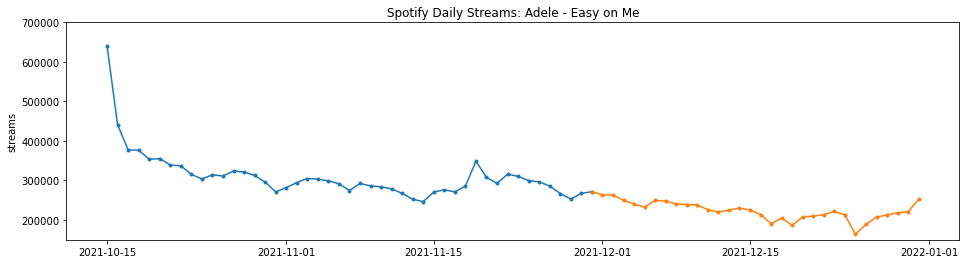

In [10]:
fig,ax = plt.subplots(figsize=(16,4))
data = df[(df.index.year==2021)&(df['track_name']=='Easy On Me')][['streams']]
data = data['2021-08-30':]
complete_dates = pd.DataFrame({'date':pd.date_range(data.index.min(), data.index.max())}).set_index('date')
data = complete_dates.join(data, how='left').fillna(0)

ax.plot(data[:'2021-11-30'], marker='.')
ax.plot(data['2021-11-30':], marker='.')

plt.ylim([150000,700000])
ax.set_ylabel('streams')
ax.set_title('Spotify Daily Streams: Adele - Easy on Me')


In [11]:
pd.date_range(data.index.min(), data.index.max())

DatetimeIndex(['2021-10-15', '2021-10-16', '2021-10-17', '2021-10-18',
               '2021-10-19', '2021-10-20', '2021-10-21', '2021-10-22',
               '2021-10-23', '2021-10-24', '2021-10-25', '2021-10-26',
               '2021-10-27', '2021-10-28', '2021-10-29', '2021-10-30',
               '2021-10-31', '2021-11-01', '2021-11-02', '2021-11-03',
               '2021-11-04', '2021-11-05', '2021-11-06', '2021-11-07',
               '2021-11-08', '2021-11-09', '2021-11-10', '2021-11-11',
               '2021-11-12', '2021-11-13', '2021-11-14', '2021-11-15',
               '2021-11-16', '2021-11-17', '2021-11-18', '2021-11-19',
               '2021-11-20', '2021-11-21', '2021-11-22', '2021-11-23',
               '2021-11-24', '2021-11-25', '2021-11-26', '2021-11-27',
               '2021-11-28', '2021-11-29', '2021-11-30', '2021-12-01',
               '2021-12-02', '2021-12-03', '2021-12-04', '2021-12-05',
               '2021-12-06', '2021-12-07', '2021-12-08', '2021-12-09',
      

Static bounds

Text(0.5, 1.0, 'Spotify Daily Streams')

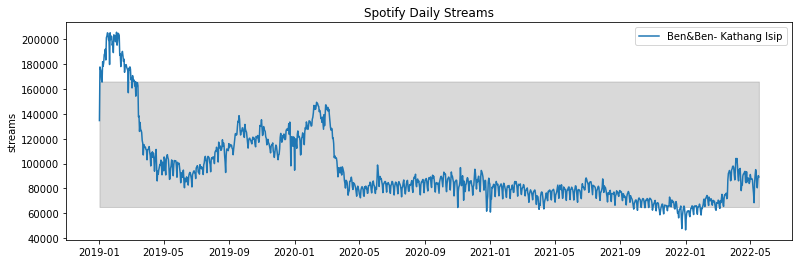

In [12]:
fig = plt.figure(figsize=(13,4))
ax = fig.add_subplot(111)

data = df[(df.index.year>=2019)&(df['track_name']=='Kathang Isip')]['streams']
ub_data = [data.quantile(0.95)]*len(data)
lb_data = [data.quantile(0.05)]*len(data)

plt.plot(data, label='Ben&Ben- Kathang Isip')
plt.fill_between(data.index, lb_data,ub_data, color='k',alpha=0.15)
plt.legend()
plt.ylabel('streams')
plt.title('Spotify Daily Streams')

Windowed bounds are more realistic because it adjusts as if the time series is being updated real time

1. Quantile-based bounds

Text(0.5, 1.0, 'Spotify Daily Streams')

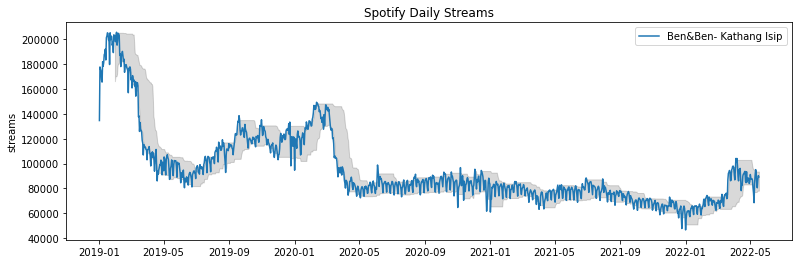

In [14]:
fig = plt.figure(figsize=(13,4))
ax = fig.add_subplot(111)

BOUNDS_WINDOW = 30
data = df[(df.index.year>=2019)&(df['track_name']=='Kathang Isip')]['streams']
ub_data = data.rolling(BOUNDS_WINDOW).quantile(0.95)
lb_data = data.rolling(BOUNDS_WINDOW).quantile(0.05)

plt.plot(data, label='Ben&Ben- Kathang Isip')
plt.fill_between(lb_data.index,lb_data,ub_data, color='k',alpha=0.15)
plt.legend()
plt.ylabel('streams')
plt.title('Spotify Daily Streams')


Text(0.5, 1.0, 'Spotify Daily Streams')

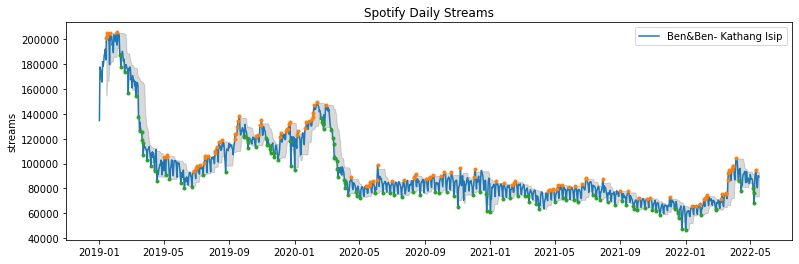

In [15]:
fig = plt.figure(figsize=(13,4))
ax = fig.add_subplot(111)

BOUNDS_WINDOW = 14
data = df[(df.index.year>=2019)&(df['track_name']=='Kathang Isip')]['streams']
ub_data = data.rolling(BOUNDS_WINDOW).quantile(0.95)
lb_data = data.rolling(BOUNDS_WINDOW).quantile(0.05)

#outliers
data_above_ub = data[data>ub_data]
data_below_lb = data[data<lb_data]

plt.plot(data, label='Ben&Ben- Kathang Isip', color='C0')
plt.plot(data_above_ub, color='C1', marker='o', ms=3, lw=0)
plt.plot(data_below_lb, color='C2', marker='o', ms=3, lw=0)

plt.fill_between(lb_data.index,lb_data,ub_data, color='k',alpha=0.15)
plt.legend()
plt.ylabel('streams')
plt.title('Spotify Daily Streams')


2. IQR-based bounds

Text(0.5, 1.0, 'Spotify Daily Streams')

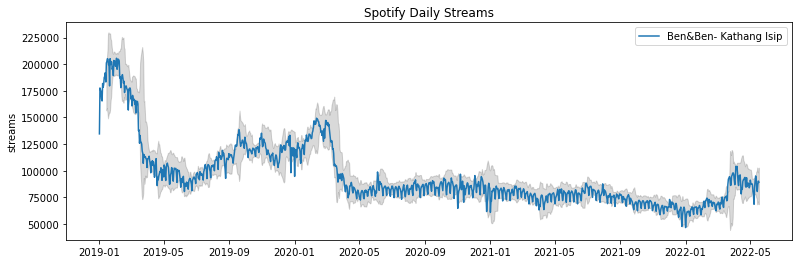

In [16]:
fig = plt.figure(figsize=(13,4))
ax = fig.add_subplot(111)

BOUNDS_WINDOW = 14
data = df[(df.index.year>=2019)&(df['track_name']=='Kathang Isip')]['streams']
mdn_data = data.rolling(BOUNDS_WINDOW).quantile(0.5)
p75_data = data.rolling(BOUNDS_WINDOW).quantile(0.75)
p25_data = data.rolling(BOUNDS_WINDOW).quantile(0.25)
IQR_data = p75_data - p25_data

lb_data = p25_data-1.5*IQR_data
ub_data = p75_data+1.5*IQR_data

plt.plot(data, label='Ben&Ben- Kathang Isip')
plt.fill_between(lb_data.index,lb_data,ub_data, color='k',alpha=0.15)
plt.legend()
plt.ylabel('streams')
plt.title('Spotify Daily Streams')


Text(0.5, 1.0, 'Spotify Daily Streams')

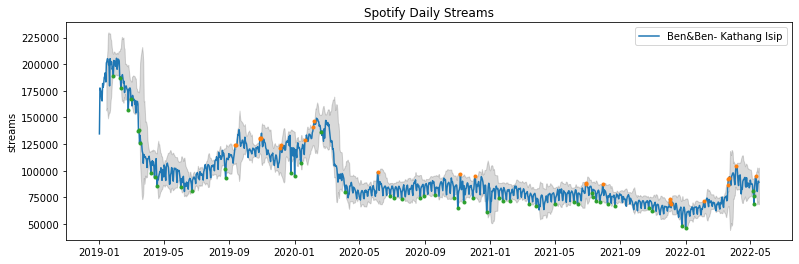

In [17]:
fig = plt.figure(figsize=(13,4))
ax = fig.add_subplot(111)

BOUNDS_WINDOW = 14
data = df[(df.index.year>=2019)&(df['track_name']=='Kathang Isip')]['streams']
mdn_data = data.rolling(BOUNDS_WINDOW).quantile(0.5)
p75_data = data.rolling(BOUNDS_WINDOW).quantile(0.75)
p25_data = data.rolling(BOUNDS_WINDOW).quantile(0.25)
IQR_data = p75_data - p25_data

lb_data = p25_data-1.5*IQR_data
ub_data = p75_data+1.5*IQR_data

#outliers
data_above_ub = data[data>ub_data]
data_below_lb = data[data<lb_data]

plt.plot(data, label='Ben&Ben- Kathang Isip')
plt.plot(data_above_ub, color='C1', marker='o', ms=3, lw=0)
plt.plot(data_below_lb, color='C2', marker='o', ms=3, lw=0)

plt.fill_between(lb_data.index,lb_data,ub_data, color='k',alpha=0.15)
plt.legend()
plt.ylabel('streams')
plt.title('Spotify Daily Streams')


## 2. Detecting cycles and trends in a time series

![](https://anomaly.io/wp-content/uploads/2015/12/time-series-decomposition-seasonal-trend.png)

Any time series may be split up, i.e. "decomposed", into a repeating part (seasonal component), a linearly moving part (trend component) and everything else (random or residual component). 

How can we decompose it to these 3 components?

### A. Seasonal and Trend decomposition using Loess (STL) Method

From the [statsmodels documentation](https://otexts.com/fpp2/stl.html) :

STL is a versatile and robust method for decomposing time series. 

STL is an acronym for “Seasonal and Trend decomposition using Loess”, while Loess is a method for estimating nonlinear relationships. 

The STL method was developed by Cleveland, Cleveland, McRae, & Terpenning (1990).

STL has several advantages over the classical decomposition methods:

 - STL will handle any type of seasonality, not only monthly and quarterly data.

 - The seasonal component is allowed to change over time, and the rate of change can be controlled by the user.

 - The smoothness of the trend-cycle can also be controlled by the user.

It can be robust to outliers (i.e., the user can specify a robust decomposition), so that occasional unusual observations will not affect the estimates of the trend-cycle and seasonal components. They will, however, affect the remainder component.

Lets look at it in action in a [sample dataset](https://www.statsmodels.org/devel/datasets/generated/co2.html) (CO2 concentration measured in Mauna Loa Observatory, Hawaii)

In [20]:
import statsmodels.api as sm
from statsmodels import datasets

sample_df = datasets.co2.load_pandas().data 
sample_df

,co2
1958-03-29,316.1
1958-04-05,317.3
1958-04-12,317.6
1958-04-19,317.5
1958-04-26,316.4
...,...
2001-12-01,370.3
2001-12-08,370.8
2001-12-15,371.2
2001-12-22,371.3


In [19]:
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2284 entries, 1958-03-29 to 2001-12-29
Freq: W-SAT
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   co2     2225 non-null   float64
dtypes: float64(1)
memory usage: 35.7 KB


<AxesSubplot:>

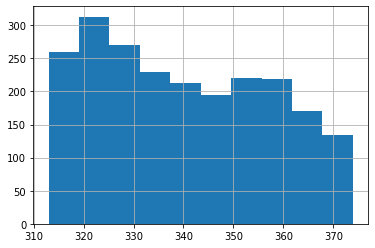

In [21]:
sample_df['co2'].hist()

<AxesSubplot:>

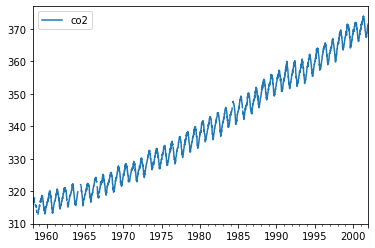

In [22]:
sample_df.plot()

Text(0.5, 1.01, 'Mauna Loa Weekly Atmospheric CO2 Concentration')

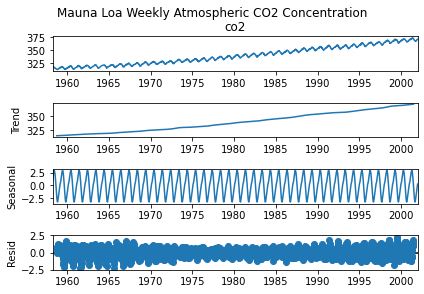

In [24]:
res = sm.tsa.seasonal_decompose(sample_df['co2'].interpolate())
resplot = res.plot()
plt.suptitle("Mauna Loa Weekly Atmospheric CO2 Concentration", y=1.01)

> Interpretation: For ~50 years, it is the increasing trend that dominates the behavior of measured CO2 over Mauna Loa, Hawaii. The seasonal and residual parts contribute less as they comprise <1% of the CO2 concentration.

In [25]:
# read and process the charts dataset
df = pd.read_csv('data/spotify_daily_charts.csv')
#transform date column into a datetime column
df['date'] = pd.to_datetime(df['date'])
df.head()

,date,position,track_id,track_name,artist,streams
0,2017-01-01,1,0kN8xEmgMW9mh7UmDYHlJP,Versace on the Floor,Bruno Mars,185236
1,2017-01-01,2,5uCax9HTNlzGybIStD3vDh,Say You Won't Let Go,James Arthur,180552
2,2017-01-01,3,7BKLCZ1jbUBVqRi2FVlTVw,Closer,The Chainsmokers,158720
3,2017-01-01,4,2rizacJSyD9S1IQUxUxnsK,All We Know,The Chainsmokers,130874
4,2017-01-01,5,5MFzQMkrl1FOOng9tq6R9r,Don't Wanna Know,Maroon 5,129656


Q: How does STL look like with top streamed artist Ben&Ben?

<AxesSubplot:xlabel='date'>

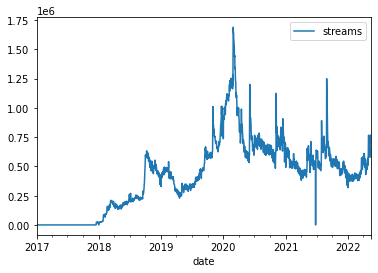

In [27]:
#get all dates
data1 = pd.DataFrame({'date':pd.unique(df['date'])}).set_index('date').asfreq('d')
#get total streams of all charting songs of the artist per day
artist_streams = df[df['artist']=='Ben&Ben'].groupby('date')[['streams']].sum()
#merge with complete dates
data1['streams']=artist_streams
#fill days with no streams with 0
data1['streams']=data1['streams'].fillna(0)
data1.plot()

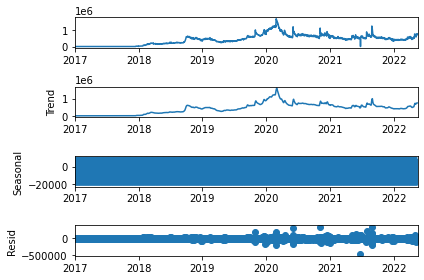

In [28]:
res = sm.tsa.seasonal_decompose(data1)
resplot = res.plot()

<AxesSubplot:xlabel='date'>

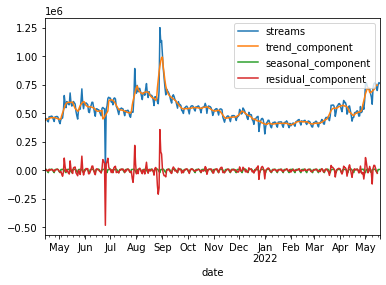

In [29]:
#get each component 
data_decomposed = data1.copy()
data_decomposed['trend_component'] = res.trend
data_decomposed['seasonal_component'] = res.seasonal
data_decomposed['residual_component'] = res.resid

data_decomposed.tail(400).plot()

Q: How about for Jose Mari Chan, a Christmas song artist?

<AxesSubplot:xlabel='date'>

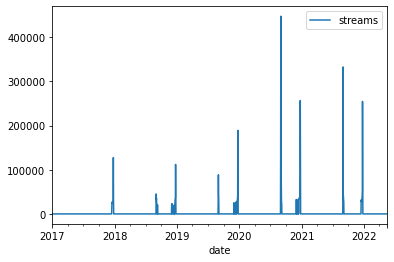

In [31]:
data2 = pd.DataFrame({'date':pd.unique(df['date'])}).set_index('date').asfreq('d')
artist_streams = df[df['artist']=='Jose Mari Chan'].groupby('date')[['streams']].sum()
data2['streams']=artist_streams
data2['streams']=data2['streams'].fillna(0)
data2.plot()

<AxesSubplot:xlabel='date'>

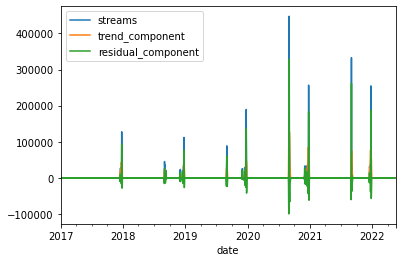

In [45]:
res = sm.tsa.seasonal_decompose(data2['streams'])
data_decomposed = data2.copy()
data_decomposed['trend_component'] = res.trend
data_decomposed['seasonal_component'] = res.seasonal
data_decomposed['residual_component'] = res.resid
data_decomposed['season_strength'] = data_decomposed['seasonal_component']/data_decomposed['trend_component']
data_decomposed[['streams','trend_component','residual_component']].plot()

## B. Autocorrelation and Partial Autocorrelation Functions

Its one thing to detect trends and seasonality in your time series data, but wouldnt it be nice if we could quantify how exactly past values influence present values? Autocorrelation and Partial Autocorrelation functions can help us achieve this goal.

### Stationarity and differencing time series data

A *stationary time series* is one whose statistical properties such as mean, variance, autocorrelation, etc. are all constant over time. Most statistical forecasting methods are based on the assumption that the time series can be rendered approximately stationary (i.e., “stationarized”) through the use of mathematical transformations. 

Lagged differencing is a simple transformation method that can be used to remove the seasonal component of the series. A lagged difference over an interval n is the difference of the value at current time t and another value at another past time t-n.

This is easily done in pandas using the `diff()` method

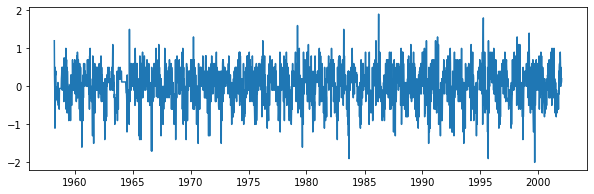

In [38]:
fig = plt.figure(figsize=(10,3))
ax = fig.add_subplot(111)

plt.plot(sample_df['co2'].interpolate().diff())

### The Autocorrelation Function (ACF)
Simply put, a time series has autocorrelation if  autocorrelation is when a time series is linearly related to a lagged version of itself. 

It is a measure of how much of the past resembles the present.

The ACF can be used to uncover and verify seasonality in time series data. 


For example, at lag = 1

![](https://46gyn61z4i0t1u1pnq2bbk2e-wpengine.netdna-ssl.com/wp-content/uploads/2018/04/Positive-and-negative-autocorrelation.png)

Autocorrelation values range from [-1,1]

Positive autocorrelation values mean that present data is similar and has likely already happened in the past. 

Negative autocorrelation values mean that present data is also similar to the past, but with an opposite sign.

In [36]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

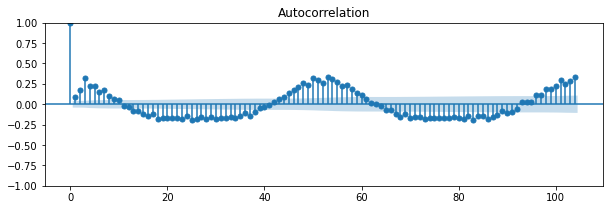

In [39]:
fig = plt.figure(figsize=(10,3))
ax = fig.add_subplot(111)

acf = plot_acf(sample_df['co2'].interpolate().diff()[1:], lags=104, ax=ax)

Values outside the band mean that the correlation value at that time lag is significant. 

> Interpretation: The peaks occur at lag 25/52 and alternates in sign, which describes how CO2 falls globally as the seasons transition from summer to winter.

### The Partial Autocorrelation Function (PACF)
The partial autocorrelation function is a measure of the correlation between observations of a time series that are separated by k time units (yt and yt–k), AFTER adjusting for the presence of all the other terms of shorter lag (yt–1, yt–2, ..., yt–k–1).

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


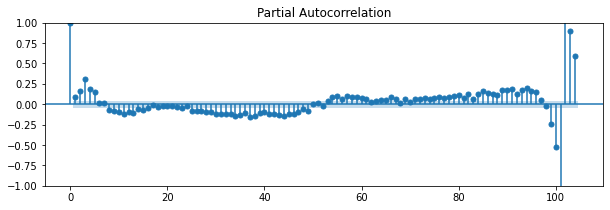

In [40]:
fig = plt.figure(figsize=(10,3))
ax = fig.add_subplot(111)

pacf = plot_pacf(sample_df['co2'].interpolate().diff()[1:], lags=104, ax=ax)
#pacf.get_xdata()

Values outside the band mean that the correlation value at that time lag is significant. 

For CO2 concentration data, the PACF lags correlation are sharpest when the finishes approximately two annual (lag 100-104) cycles.

> Q: How does ACF and PACF look like for Ben&Ben and Jose Mari Chan's total daily streams

Ben&Ben

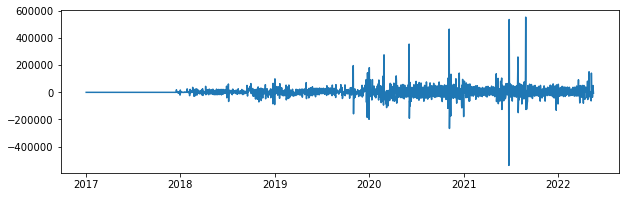

In [41]:
#stationarize
fig = plt.figure(figsize=(10,3))
ax = fig.add_subplot(111)

plt.plot(data1['streams'].interpolate().diff()[1:])

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


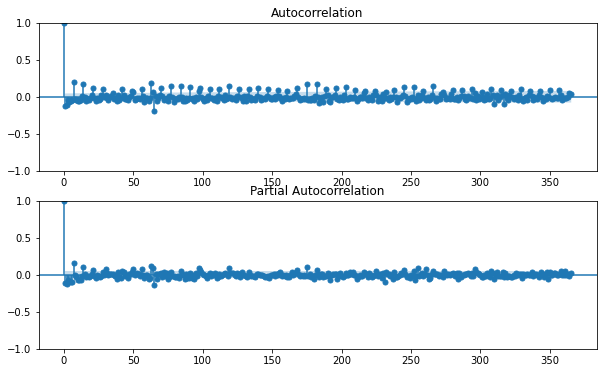

In [42]:
#Ben & Ben
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

acf = plot_acf(data1['streams'].interpolate().diff()[1:], lags=365, ax=ax1)
pacf = plot_pacf(data1['streams'].interpolate().diff()[1:], lags=365, ax=ax2)

Jose Mari Chan

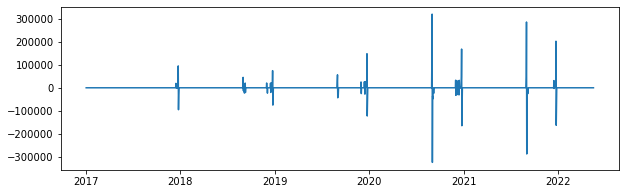

In [43]:
fig = plt.figure(figsize=(10,3))
ax = fig.add_subplot(111)

plt.plot(data2['streams'].interpolate().diff()[1:])

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


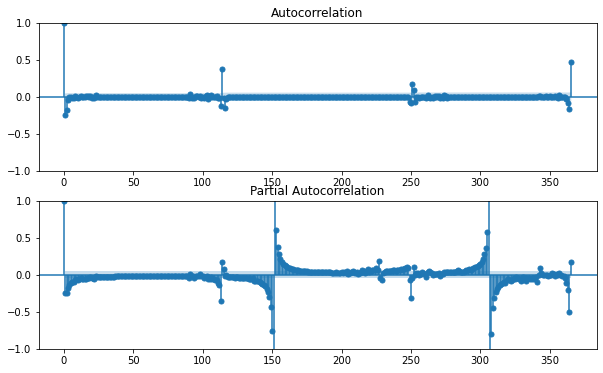

In [44]:
#Jose Mari Chan
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

#full year lag
acf = plot_acf(data2['streams'].interpolate().diff()[1:], lags=365, ax=ax1)
pacf = plot_pacf(data2['streams'].interpolate().diff()[1:], lags=365, ax=ax2)

### Resources
-  More about decomposing time series [here](https://machinelearningmastery.com/decompose-time-series-data-trend-seasonality/)
-  Fundamental time series forecasting methods in more detail [here](https://www.analyticsvidhya.com/blog/2018/02/time-series-forecasting-methods/)
-  ACF and PACF explained in more detail [here](https://machinelearningmastery.com/gentle-introduction-autocorrelation-partial-autocorrelation/)
-  How to use PACF to tune ARIMA models [here](https://support.minitab.com/en-us/minitab/19/help-and-how-to/statistical-modeling/time-series/how-to/partial-autocorrelation/interpret-the-results/partial-autocorrelation-function-pacf/)
